# Impor Librari dan Modul yang Diperlukan

In [ ]:
# Import Necessary Libraries and Modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
from sklearn.cluster import KMeans
import plotly.express as px

# Muat Dataset, Jelajahi, dan Bersihkan Dataset

In [ ]:
# Impor dataset
data = pd.read_csv('customer_shopping_data.csv')
data.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,99457.0,43.427089,14.990054,18.00,30.00,43.0,56.00,69.0
quantity,99457.0,3.003429,1.413025,1.00,2.00,3.0,4.00,5.0
price,99457.0,689.256321,941.184567,5.23,45.45,203.3,1200.32,5250.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [ ]:
data['invoice_date'] = pd.to_datetime(data['invoice_date'], format='%d/%m/%Y')

In [ ]:
# Periksa nilai yang hilang di setiap kolom
data.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [ ]:
# Hapus baris dengan Kuantitas dan Harga negatif
data = data[(data['quantity'] > 0) & (data['price'] > 0)]

In [ ]:
data['customer_id'] = data['customer_id'].astype(str)
print(data.dtypes)

invoice_no                object
customer_id               object
gender                    object
age                        int64
category                  object
quantity                   int64
price                    float64
payment_method            object
invoice_date      datetime64[ns]
shopping_mall             object
dtype: object


# Analisa demografi dan perilaku

## 1. Analisis Demografis

In [ ]:
# Distribusi gender customer
df_gbd = data['gender'].value_counts()
df_gbd

gender
Female    59482
Male      39975
Name: count, dtype: int64

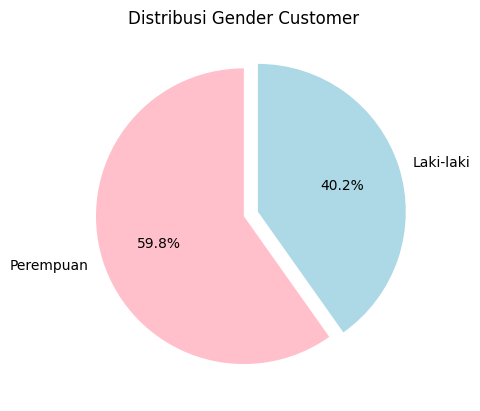

In [ ]:
labels = ['Perempuan', 'Laki-laki']

plt.pie(df_gbd, labels=labels, autopct='%1.1f%%', startangle= 90, explode = [0, 0.1], colors = ['pink', 'lightblue'])
plt.title('Distribusi Gender Customer')
plt.show()


In [ ]:
# Distribusi usia di antara customer
age_bins = [18,25,35,45,55,65,70]
age_labels = ['Remaja', 'Dewasa Muda', 'Dewasa Tengah', 'Dewasa Awal', 'Dewasa Lanjut', 'Manula']
data['age_group'] = pd.cut(data['age'], bins = age_bins, labels=age_labels)

age_distribution = data['age_group'].value_counts()
age_distribution

age_group
Dewasa Tengah    19436
Dewasa Muda      19059
Dewasa Awal      19016
Dewasa Lanjut    19016
Remaja           13515
Manula            7571
Name: count, dtype: int64

Rata-rata usia customer: 43
Rata-rata kelompok usia: Dewasa Tengah


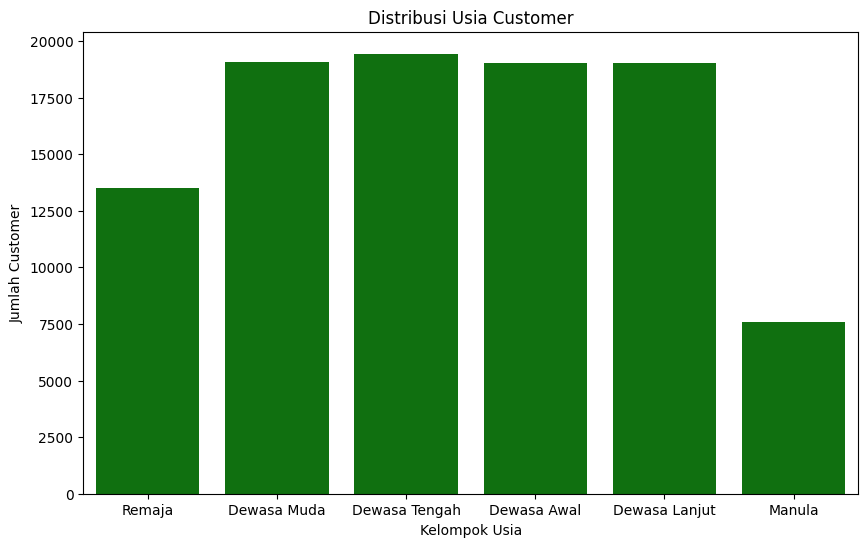

In [ ]:
plt.figure(figsize = (10,6))

sns.barplot(x=age_distribution.index, y = age_distribution.values, color = 'green')
# Menambahkan label untuk setiap kelompok usia
for i, count in enumerate(age_distribution.values):
    plt.text(i, count, str(count), ha='center', va='bottom', alpha=0)

print(f"Rata-rata usia customer: {data['age'].mean():.0f}")
print(f"Rata-rata kelompok usia: {data['age_group'].mode()[0]}")

plt.xlabel('Kelompok Usia')
plt.ylabel('Jumlah Customer')
plt.title('Distribusi Usia Customer')
plt.xticks(rotation= 0)
plt.show()

In [ ]:
# Perbandingan gender dalam kelompok usia
df_genderXage = data.groupby(['gender', 'age_group']).size().reset_index(name='count')
df_genderXage.T

,0,1,2,3,4,5,6,7,8,9,10,11
gender,Female,Female,Female,Female,Female,Female,Male,Male,Male,Male,Male,Male
age_group,Remaja,Dewasa Muda,Dewasa Tengah,Dewasa Awal,Dewasa Lanjut,Manula,Remaja,Dewasa Muda,Dewasa Tengah,Dewasa Awal,Dewasa Lanjut,Manula
count,8003,11410,11762,11334,11377,4517,5512,7649,7674,7682,7639,3054


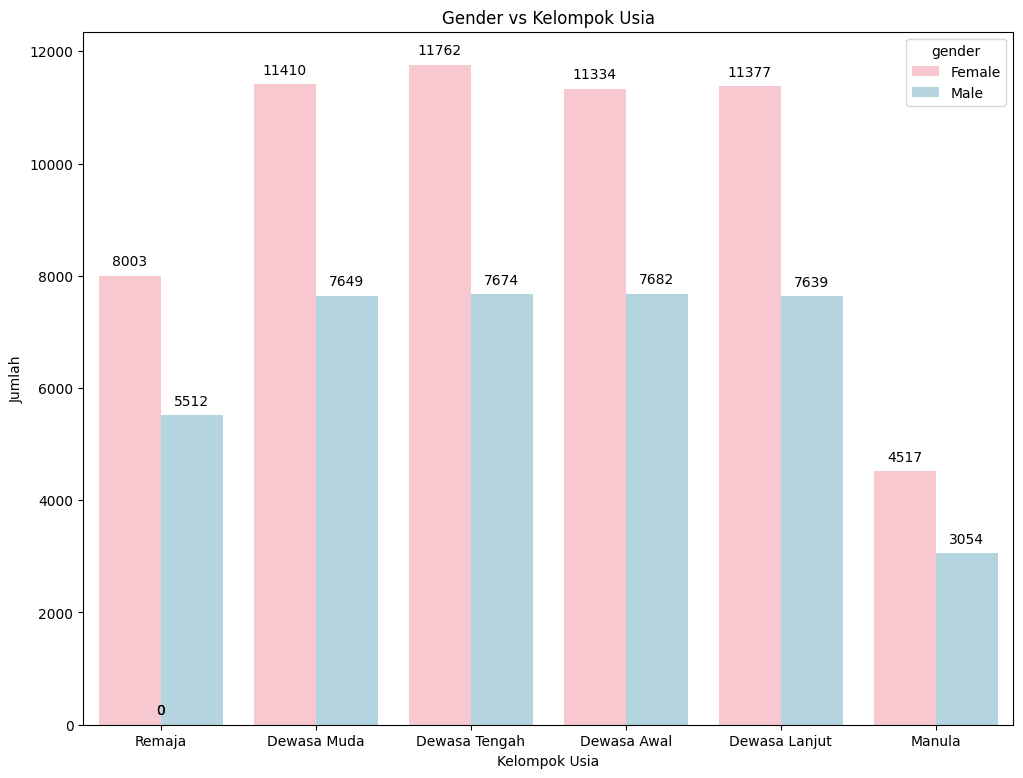

In [ ]:
plt.figure(figsize=(12,9))
ax = sns.barplot(x = 'age_group', y = 'count', hue='gender', data = df_genderXage, palette = ['pink', 'lightblue'])

for p in ax.patches:
  total_count = p.get_height()
  ax.annotate(f'{total_count:.0f}', (p.get_x() + p.get_width() / 2. , p.get_height()), ha = 'center', va = 'center', xytext = (0,10),textcoords = 'offset points')

plt.title('Gender vs Kelompok Usia')
plt.xlabel('Kelompok Usia')
plt.ylabel('Jumlah')
plt.show()

In [ ]:
# Distribusi usia di berbagai kategori produk
df_ageXcategory = data.groupby(['category', 'age_group']).size().reset_index(name='count')
df_ageXcategory

,category,age_group,count
0,Books,Remaja,682
1,Books,Dewasa Muda,920
2,Books,Dewasa Tengah,940
3,Books,Dewasa Awal,981
4,Books,Dewasa Lanjut,969
5,Books,Manula,383
6,Clothing,Remaja,4691
7,Clothing,Dewasa Muda,6614
8,Clothing,Dewasa Tengah,6711
9,Clothing,Dewasa Awal,6609


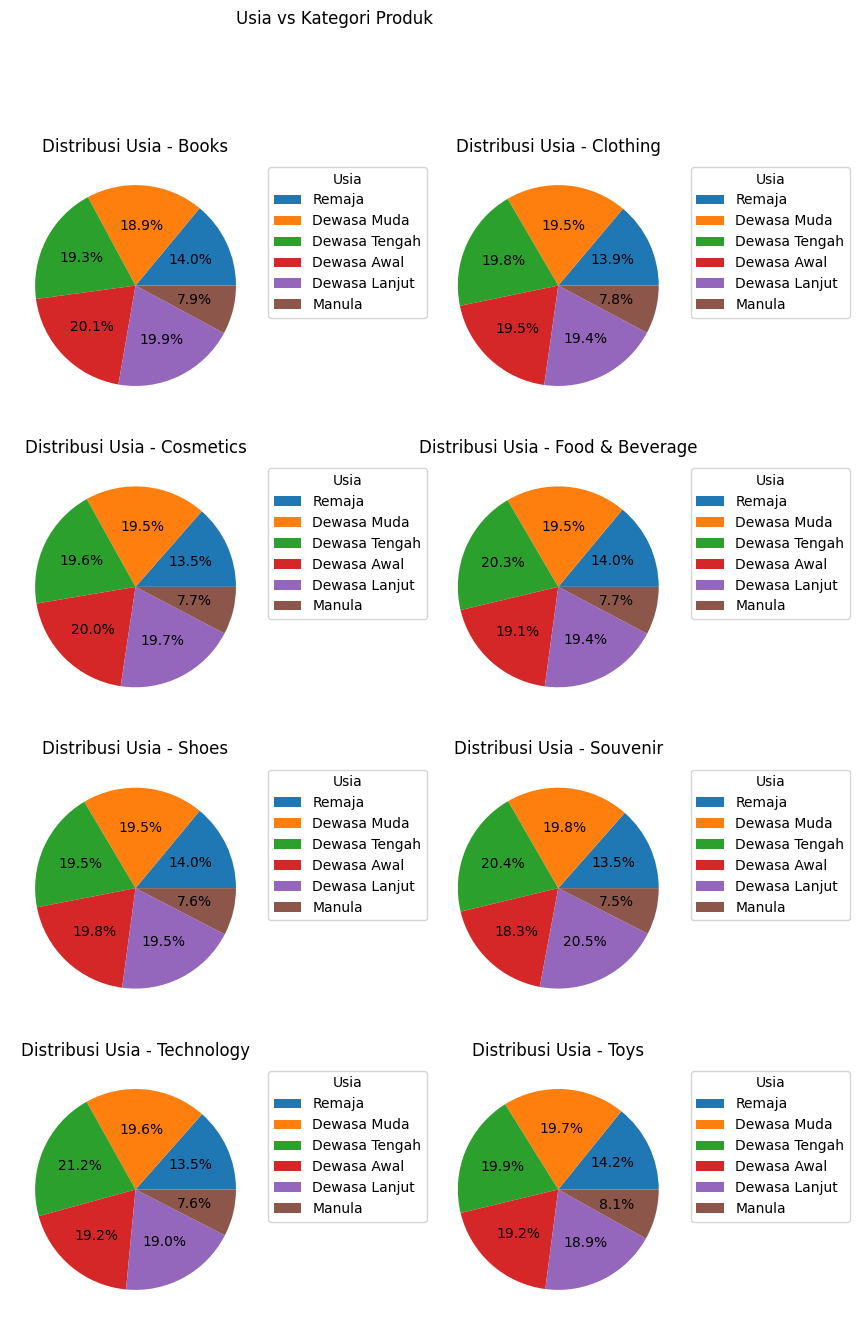

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 15))

# Loop untuk setiap kategori produk
for i, category in enumerate(df_ageXcategory['category'].unique()):
    df_filtered = df_ageXcategory[df_ageXcategory['category'] == category]

    # Buat pie chart pada subplot
    axes[i // 2, i % 2].pie(df_filtered['count'], autopct='%1.1f%%')
    axes[i // 2, i % 2].set_title(f'Distribusi Usia - {category}')
    axes[i // 2, i % 2].legend(df_filtered['age_group'], title="Usia", bbox_to_anchor=(1, 0, 0.5, 1))

fig.suptitle('Usia vs Kategori Produk')
plt.show()


In [ ]:
# Distribusi gender di berbagai kategori produk
df_genderXcategory = data.groupby(['gender', 'category']).size().reset_index(name = 'count')
df_genderXcategory

,gender,category,count
0,Female,Books,2906
1,Female,Clothing,20652
2,Female,Cosmetics,9070
3,Female,Food & Beverage,8804
4,Female,Shoes,5967
5,Female,Souvenir,3017
6,Female,Technology,2981
7,Female,Toys,6085
8,Male,Books,2075
9,Male,Clothing,13835


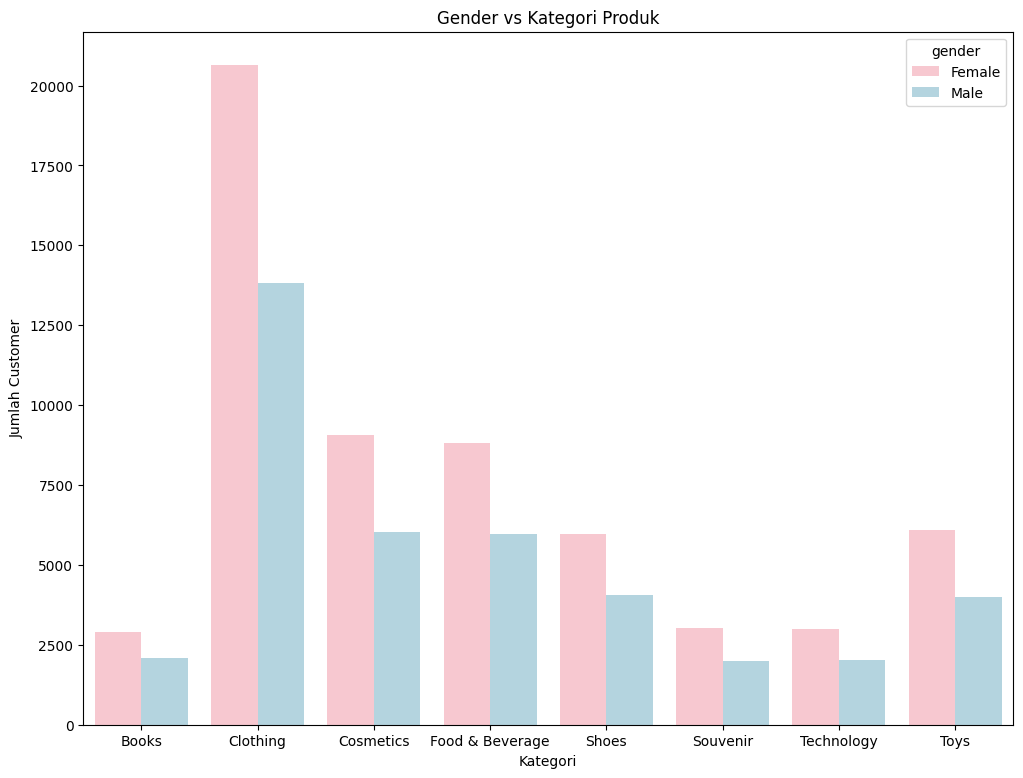

In [ ]:
plt.figure(figsize=(12,9))

sns.barplot(x='category', y='count', hue= 'gender', data=df_genderXcategory, palette = ['pink', 'lightblue'])
plt.title('Gender vs Kategori Produk')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Customer')
plt.show()

## 2. Riwayat Pembelian

In [ ]:
# Kategori produk berdasarkan penjualan
df_categoryXquantity = data.groupby('category')['quantity'].sum()
df_categoryXquantity

category
Books               14982
Clothing           103558
Cosmetics           45465
Food & Beverage     44277
Shoes               30217
Souvenir            14871
Technology          15021
Toys                30321
Name: quantity, dtype: int64

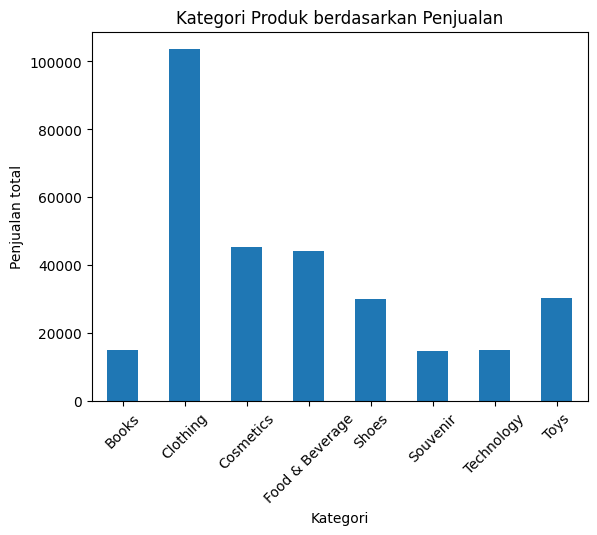

In [ ]:
df_categoryXquantity.sort_index().plot(kind = 'bar')
plt.title('Kategori Produk berdasarkan Penjualan')
plt.xlabel('Kategori')
plt.ylabel('Penjualan total')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
# Total transaksi yang dilakukan berdasarkan metode pembayaran
df_priceXpayment_method = data.groupby('payment_method')['price'].count()
df_priceXpayment_method

payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
Name: price, dtype: int64

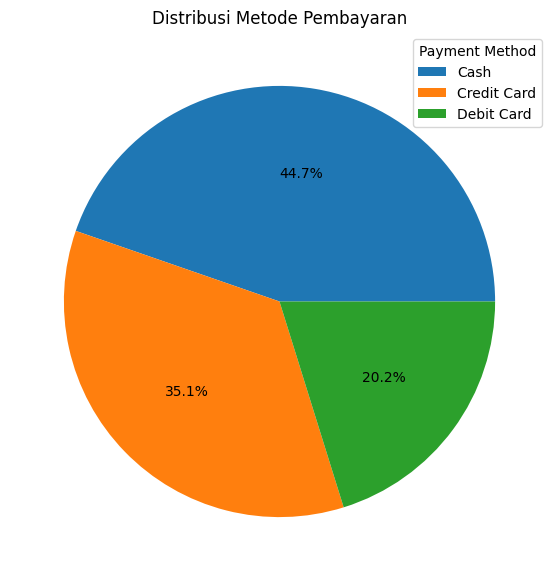

In [ ]:
labels = ['Cash', 'Credit Card', 'Debit Card']

plt.figure(figsize=(7, 7))
plt.pie(df_priceXpayment_method, autopct='%1.1f%%')
plt.title('Distribusi Metode Pembayaran')
plt.legend(title='Payment Method', labels=labels, loc='upper right')
plt.show()

## 3. Perilaku Pelanggan

In [ ]:
# Distribusi Shopping Mall. Seberapa sering pelanggan berbelanja di pusat perbelanjaan yang berbeda?
df_shopping_mall = data['shopping_mall'].value_counts()
df_shopping_mall

shopping_mall
Mall of Istanbul     19943
Kanyon               19823
Metrocity            15011
Metropol AVM         10161
Istinye Park          9781
Zorlu Center          5075
Cevahir AVM           4991
Forum Istanbul        4947
Viaport Outlet        4914
Emaar Square Mall     4811
Name: count, dtype: int64

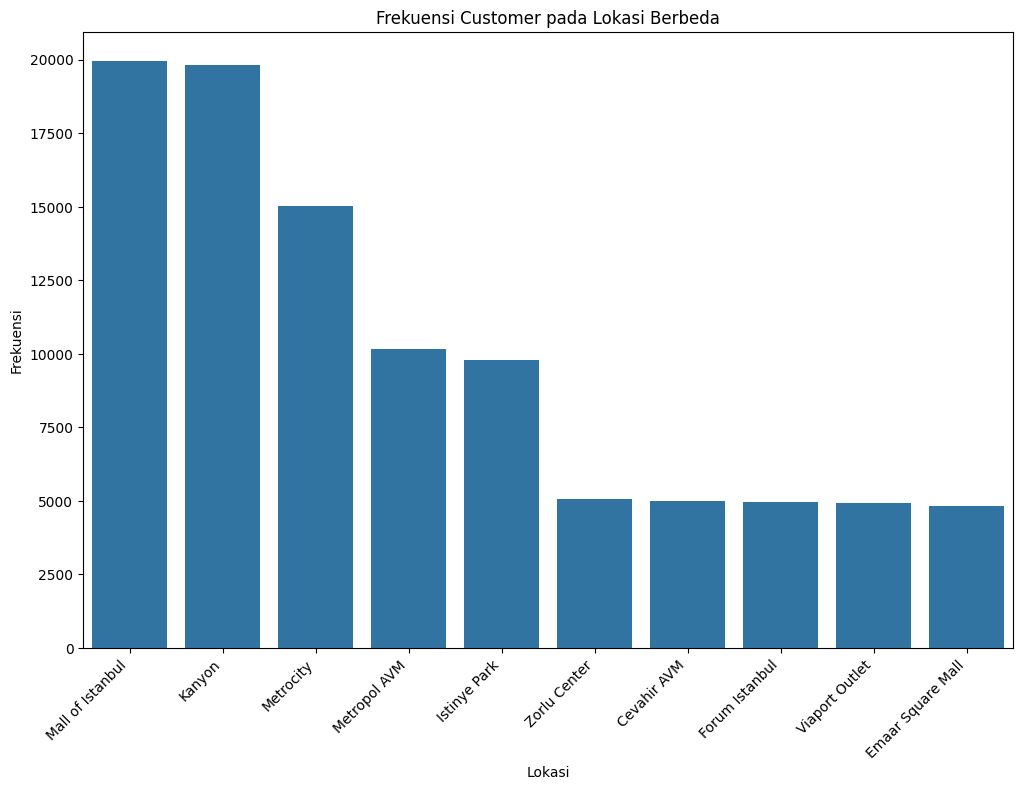

In [ ]:
plt.figure(figsize = (12,8))

sns.barplot(x=df_shopping_mall.index, y=df_shopping_mall.values)

plt.xlabel('Lokasi')
plt.ylabel('Frekuensi')
plt.title('Frekuensi Customer pada Lokasi Berbeda')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

In [ ]:
# Apakah ada metode pembayaran tertentu yang lebih disukai oleh kelompok usia yang berbeda?
df_ageXpayment = data.groupby(['age_group', 'payment_method']).size().reset_index(name = 'count')
df_ageXpayment

,age_group,payment_method,count
0,Remaja,Cash,6023
1,Remaja,Credit Card,4772
2,Remaja,Debit Card,2720
3,Dewasa Muda,Cash,8523
4,Dewasa Muda,Credit Card,6653
5,Dewasa Muda,Debit Card,3883
6,Dewasa Tengah,Cash,8679
7,Dewasa Tengah,Credit Card,6832
8,Dewasa Tengah,Debit Card,3925
9,Dewasa Awal,Cash,8462


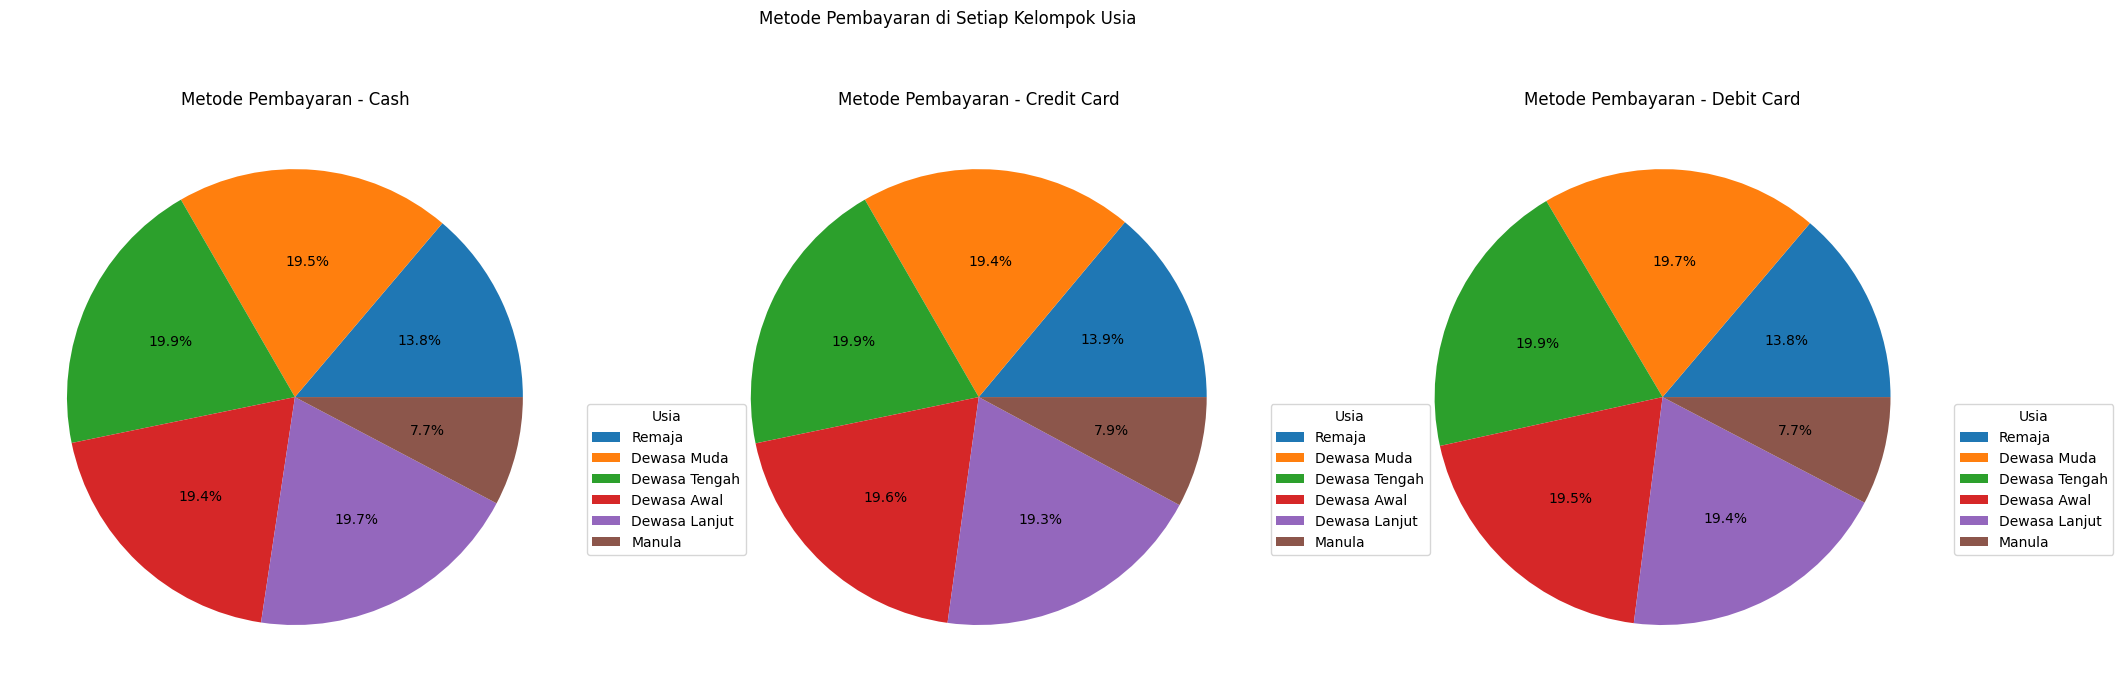

In [ ]:
# Hitung jumlah subplot yang dibutuhkan
n_subplots = len(df_ageXpayment['payment_method'].unique())

# Buat subplot
fig, axes = plt.subplots(nrows=1, ncols=n_subplots, figsize=(25, 8))

# Loop untuk setiap metode pembayaran
for i, payment_method in enumerate(df_ageXpayment['payment_method'].unique()):
    df_filtered = df_ageXpayment[df_ageXpayment['payment_method'] == payment_method]

    # Buat pie chart pada subplot
    axes[i].pie(df_filtered['count'], autopct='%1.1f%%')
    axes[i].set_title(f'Metode Pembayaran - {payment_method}')
    axes[i].legend(df_filtered['age_group'], title="Usia", bbox_to_anchor=(1, 0.5))

# Atur judul keseluruhan
fig.suptitle('Metode Pembayaran di Setiap Kelompok Usia')
plt.show()


## 4. Tren Musiman

In [ ]:
# Menambahkan kolom sales, bulan dan tahun
data['sales_amount'] = data['quantity'] * data['price']
data['month'] = data['invoice_date'].dt.month
data['year'] = data['invoice_date'].dt.year

In [ ]:
#Menganalisis variasi bulanan dalam volume penjualan
monthly_sales_amount = data.groupby('month')['sales_amount'].sum()
monthly_sales_amount

month
1     28891525.59
2     26625090.10
3     21956191.33
4     18715685.98
5     19719331.10
6     18933775.30
7     20378722.63
8     19282361.29
9     18795794.91
10    20545090.43
11    18207139.95
12    19455085.64
Name: sales_amount, dtype: float64

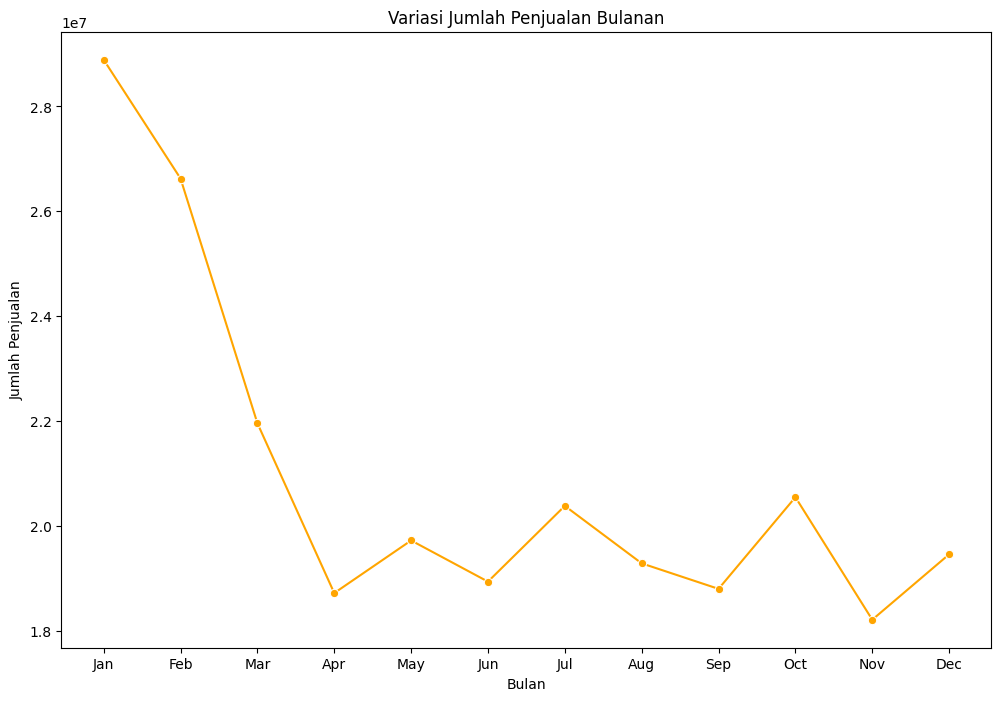

In [ ]:
plt.figure(figsize= (12,8))
sns.lineplot(x=monthly_sales_amount.index, y=monthly_sales_amount.values, marker = 'o', color = 'orange')
plt.title('Variasi Jumlah Penjualan Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penjualan')
plt.xticks(range(1,13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [ ]:
#Menganalisis variasi bulanan dalam volume penjualan (setiap tahun)
monthly_sales_amount = data.groupby(['year','month'], as_index = False).agg({'sales_amount':'sum'})
monthly_sales_amount

,year,month,sales_amount
0,2021,1,9641614.62
1,2021,2,8772315.22
2,2021,3,9455359.38
3,2021,4,9389541.54
4,2021,5,9771756.97
5,2021,6,9286271.35
6,2021,7,10311119.68
7,2021,8,9630655.70
8,2021,9,9188165.62
9,2021,10,10263015.06


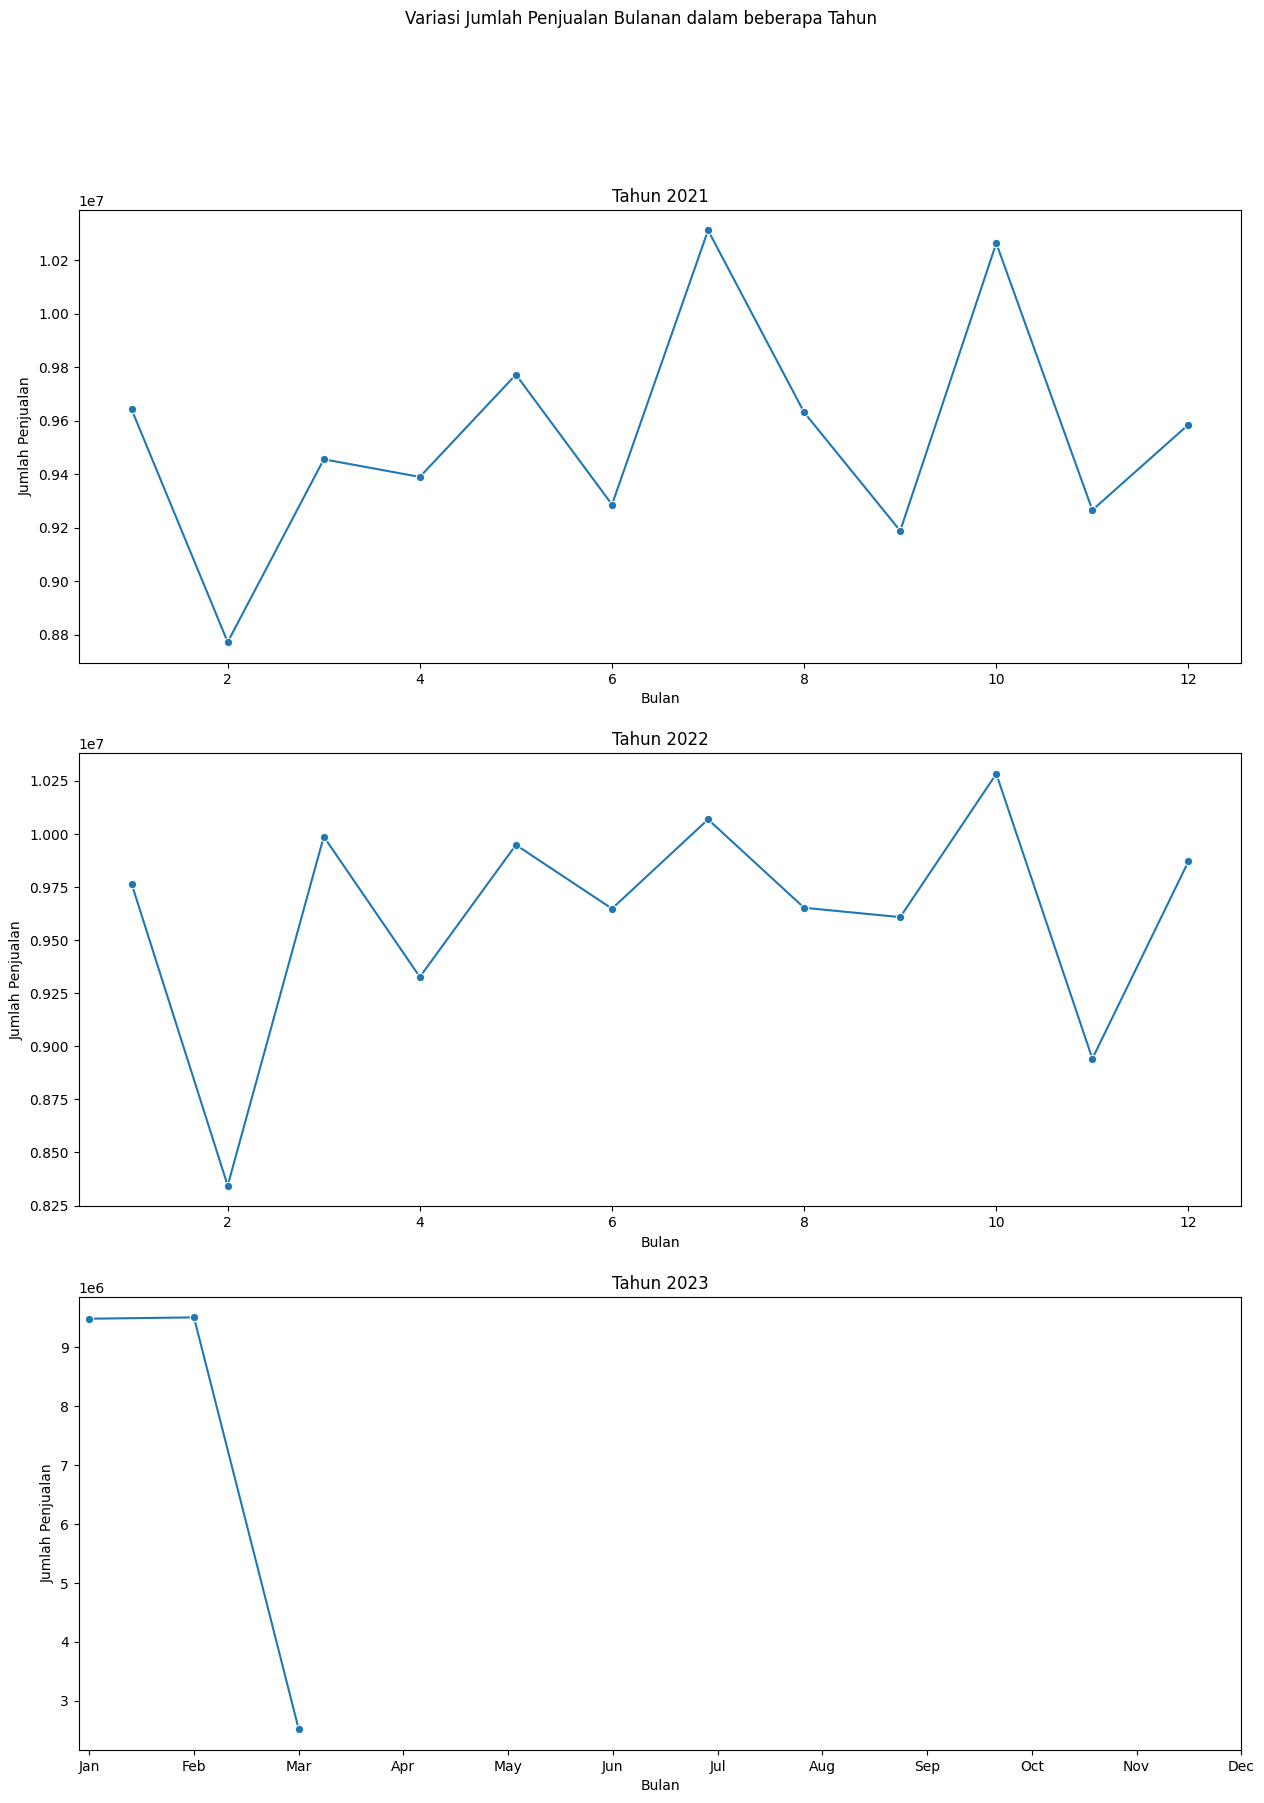

In [ ]:
# Hitung jumlah subplot yang dibutuhkan
n_subplots = len(monthly_sales_amount['year'].unique())

# Buat subplot
fig, axes = plt.subplots(nrows=n_subplots, ncols=1, figsize=(15, 20))

# Loop untuk setiap tahun
for i, year in enumerate(monthly_sales_amount['year'].unique()):
    df_filtered = monthly_sales_amount[monthly_sales_amount['year'] == year]

    # Buat lineplot pada subplot
    sns.lineplot(x='month', y='sales_amount', data=df_filtered, marker='o', ax=axes[i])

    # Atur judul dan label
    axes[i].set_title(f'Tahun {year}')
    axes[i].set_xlabel('Bulan')
    axes[i].set_ylabel('Jumlah Penjualan')

    # Atur label sumbu X untuk subplot terakhir
    if i == n_subplots - 1:
        axes[i].set_xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Atur judul keseluruhan
fig.suptitle('Variasi Jumlah Penjualan Bulanan dalam beberapa Tahun')
plt.show()


In [ ]:
# Mengelompokkan data berdasarkan musim dan jumlah penjualan
def map_to_season(month):
  if month in [11, 12 , 1]:
    return 'Winter'
  elif month in [2,3,4]:
    return 'Spring'
  elif month in [5,6,7]:
    return 'Fall'
  else:
    return 'Summer'

data['seasons'] = data['month'].apply(map_to_season)
seasonal_sales = data.groupby('seasons')['sales_amount'].sum()
seasonal_sales

seasons
Fall      59031829.03
Spring    67296967.41
Summer    58623246.63
Winter    66553751.18
Name: sales_amount, dtype: float64

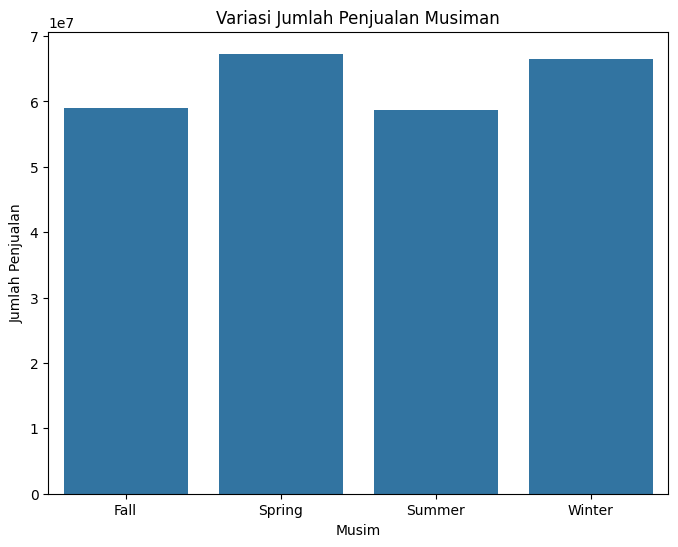

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=seasonal_sales.index, y=seasonal_sales.values)
plt.title('Variasi Jumlah Penjualan Musiman')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penjualan')
plt.show()

# Menghitung Resensi, Frekuensi, dan Monetari

In [ ]:
snapshot_date = max(data['invoice_date']) + pd.DateOffset(days=1)

In [ ]:
data['Total'] = data['quantity'] * data['price']

In [ ]:
rfm = data.groupby('customer_id').agg({
    'invoice_date': lambda x: (snapshot_date - x.max()).days,
    'invoice_no': 'nunique',
    'Total': 'sum'
})

In [ ]:
rfm.rename(columns={'invoice_date': 'Recency', 'invoice_no': 'Frequency', 'Total': 'Monetary'}, inplace=True)
rfm.head()

,Recency,Frequency,Monetary
customer_id,,,
C100004,468,1,7502.00
C100005,6,1,2400.68
C100006,98,1,322.56
C100012,571,1,130.75
C100019,592,1,35.84


# Memetakan Nilai RFM ke dalam Skala 1-5

In [ ]:
rfm.describe()

,Recency,Frequency,Monetary
count,99457.000000,99457.0,99457.000000
mean,397.884030,1.0,2528.789268
std,229.871351,0.0,4222.475781
min,1.000000,1.0,5.230000
25%,199.000000,1.0,136.350000
50%,397.000000,1.0,600.170000
75%,598.000000,1.0,2700.720000
max,797.000000,1.0,26250.000000


In [ ]:
# Menghitung custom bin edges untuk skor Resensi, Frekuensi, dan Monetari
recency_bins = [rfm['Recency'].min()-1, 20, 50, 150, 250, rfm['Recency'].max()]
frequency_bins = [rfm['Frequency'].min() - 1, 2, 3, 10, 100, rfm['Frequency'].max()]
monetary_bins = [rfm['Monetary'].min() - 3, 300, 600, 2000, 5000, rfm['Monetary'].max()]

In [ ]:
# Tentukan custom bins untuk Frekuensi dan Monetari
frequency_bins = [0, 1, 2, 5, 10, np.inf]
monetary_bins = [0, 50, 100, 200, 500, np.inf]

In [ ]:
# Menghitung skor Resensi berdasarkan custom bins
rfm['R_Score'] = pd.cut(rfm['Recency'], bins=recency_bins, labels=range(1, 6), include_lowest=True)

# Membalikkan skor Kemutakhiran sehingga nilai yang lebih tinggi menunjukkan pembelian yang lebih baru
rfm['R_Score'] = 5 - rfm['R_Score'].astype(int) + 1

# Menghitung skor Frekuensi dan Monetari berdasarkan custom bins
rfm['F_Score'] = pd.cut(rfm['Frequency'], bins=frequency_bins, labels=range(1, 6), include_lowest=True).astype(int)
rfm['M_Score'] = pd.cut(rfm['Monetary'], bins=monetary_bins, labels=range(1, 6), include_lowest=True).astype(int)

In [ ]:
print(rfm[['R_Score', 'F_Score', 'M_Score']].head(10))

             R_Score  F_Score  M_Score
customer_id                           
C100004            1        1        5
C100005            5        1        5
C100006            3        1        4
C100012            1        1        3
C100019            1        1        1
C100025            1        1        3
C100028            1        1        1
C100030            3        1        5
C100034            1        1        5
C100041            1        1        5


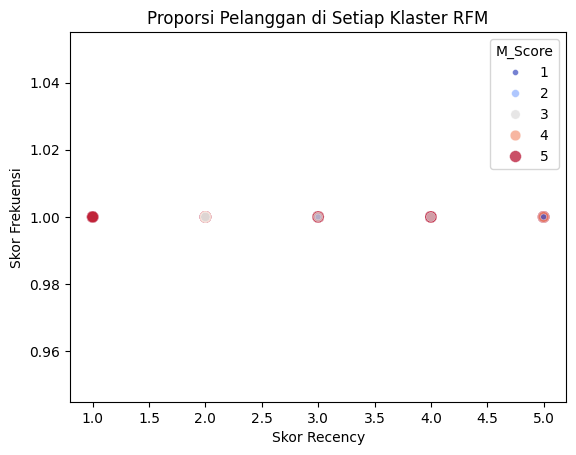

In [ ]:
# Buat kolom baru untuk setiap kombinasi skor RFM
rfm['RF_Cluster'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

# Hitung proporsi pelanggan di setiap klaster
rfm_cluster_proportions = rfm.groupby('RF_Cluster').size() / rfm.shape[0]

# Buat scatter plot
sns.scatterplot(data=rfm, x='R_Score', y='F_Score', hue='M_Score', size='M_Score',
                palette='coolwarm', legend='full', alpha=0.7)

# Tambahkan judul dan label sumbu
plt.title('Proporsi Pelanggan di Setiap Klaster RFM')
plt.xlabel('Skor Recency')
plt.ylabel('Skor Frekuensi')
plt.show()


# Melakukan Pengklasteran K-Means

In [ ]:
# Ekstrak skor RFM untuk pengklasteran K-means
X = rfm[['R_Score', 'F_Score', 'M_Score']]

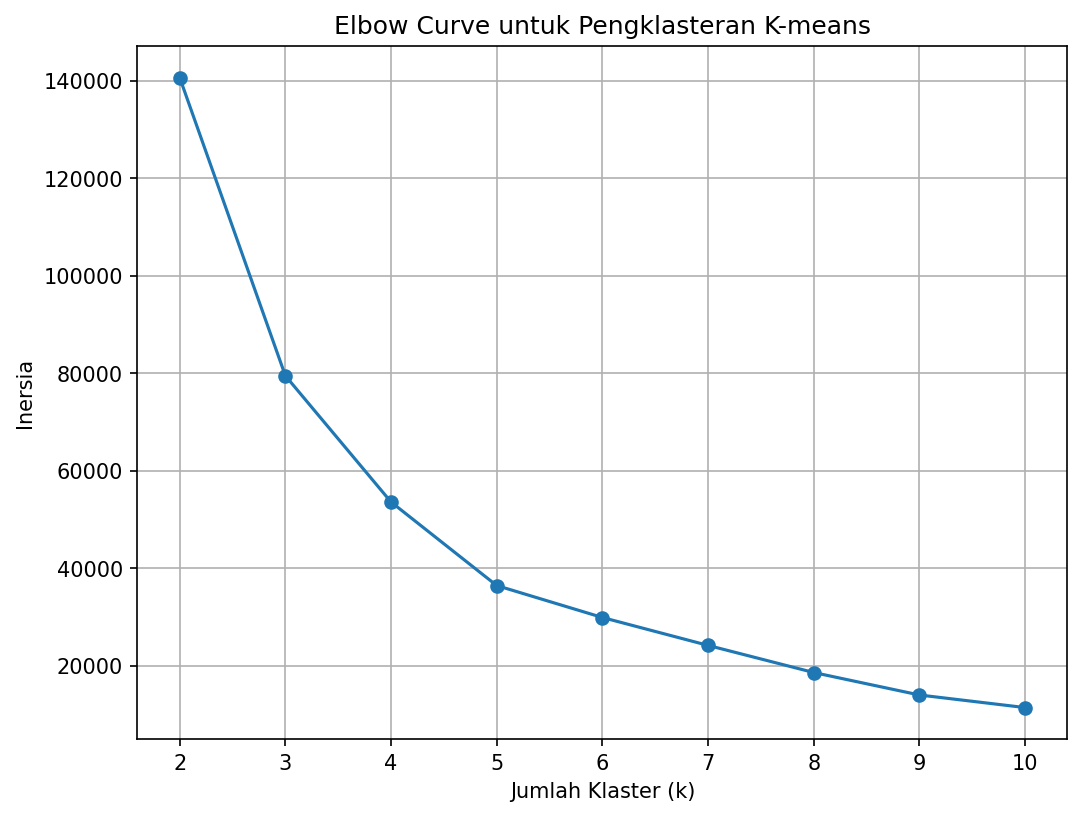

In [ ]:
# Hitung inersia (jumlah jarak kuadrat) untuk nilai k yang berbeda
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init= 10, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6),dpi=150)
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Inersia')
plt.title('Elbow Curve untuk Pengklasteran K-means')
plt.grid(True)
plt.show()

In [ ]:
# Lakukan pengklasteran K-means dengan K terbaik
best_kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
rfm['Cluster'] = best_kmeans.fit_predict(X)

# Menafsirkan Klaster untuk Mengidentifikasi Segmen Pelanggan


In [ ]:
# Kelompokkan berdasarkan klaster dan hitung nilai rata-rata
cluster_summary = rfm.groupby('Cluster').agg({
    'R_Score': 'mean',
    'F_Score': 'mean',
    'M_Score': 'mean'
}).reset_index()

In [ ]:
print(cluster_summary)

   Cluster   R_Score  F_Score   M_Score
0        0  1.564741      1.0  1.177611
1        1  3.485288      1.0  4.491451
2        2  1.154775      1.0  5.000000
3        3  1.156454      1.0  3.579558


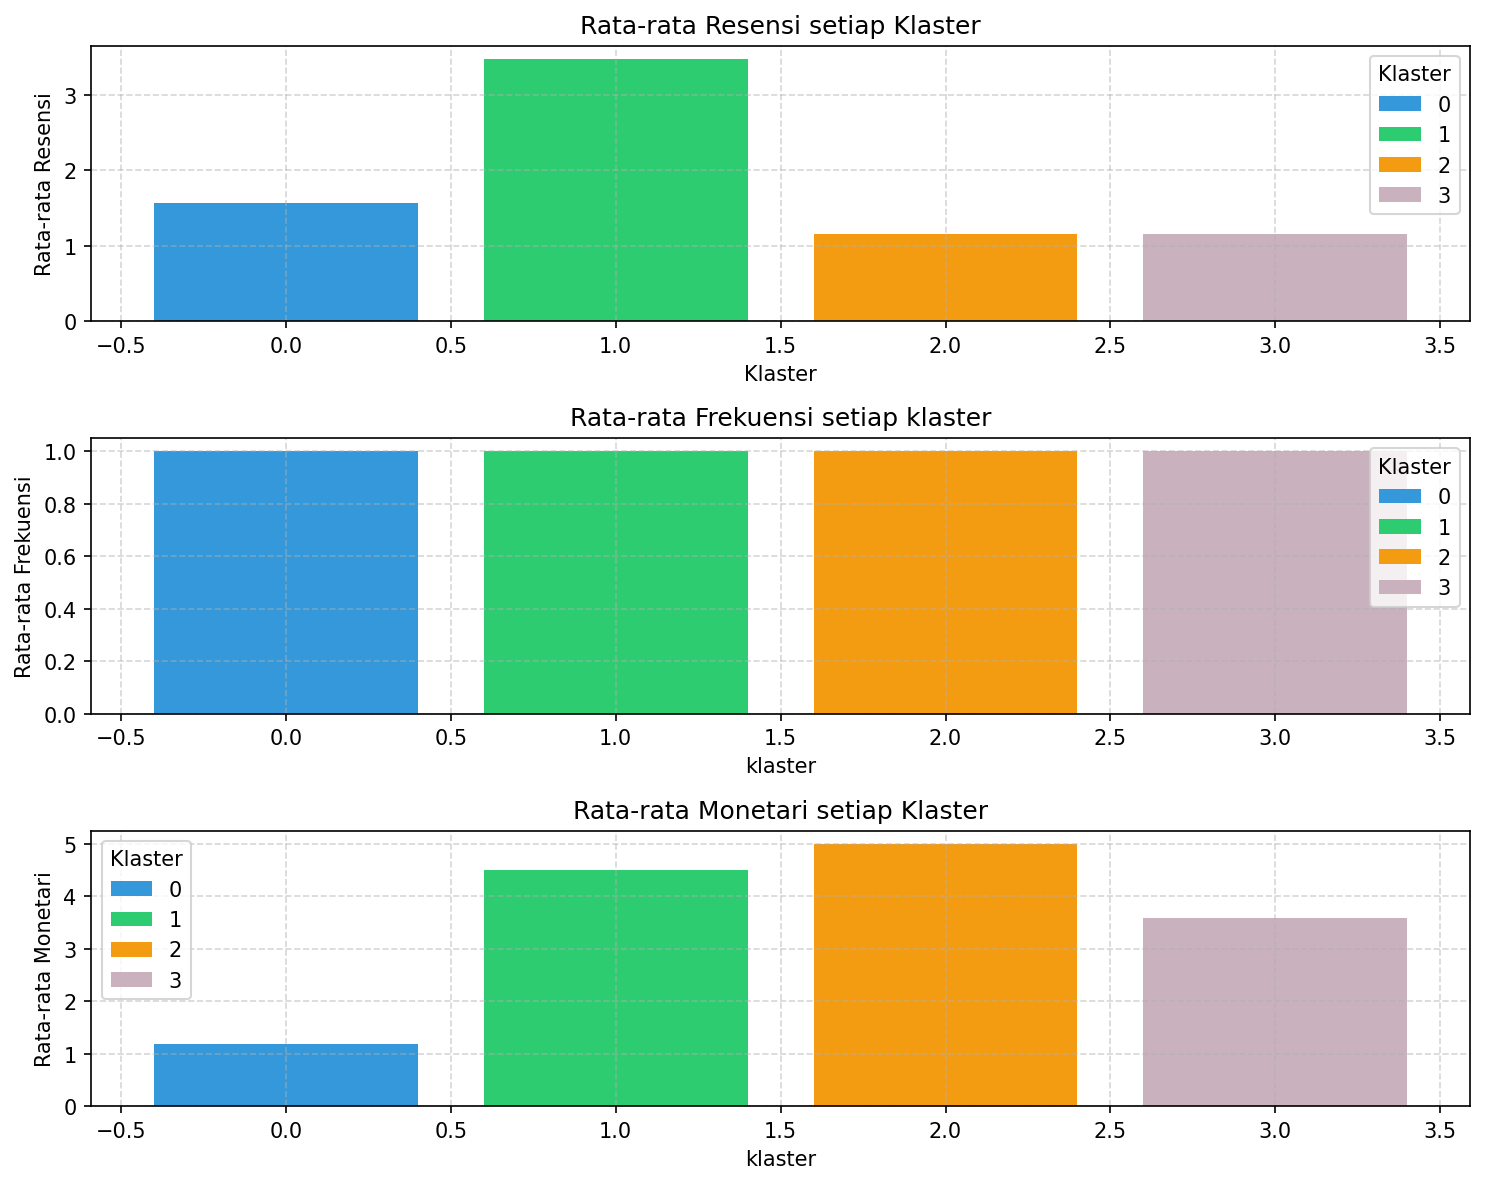

In [ ]:
colors = ['#3498db', '#2ecc71', '#f39c12','#C9B1BD']
plt.figure(figsize=(10, 8),dpi=150)

# Plot Rata-rata Resensi
plt.subplot(3, 1, 1)
bars = plt.bar(cluster_summary.index, cluster_summary['R_Score'], color=colors)
plt.xlabel('Klaster')
plt.ylabel('Rata-rata Resensi')
plt.title('Rata-rata Resensi setiap Klaster')

plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bars, cluster_summary.index, title='Klaster')

# Plot Rata-rata Frekuensi
plt.subplot(3, 1, 2)
bars = plt.bar(cluster_summary.index, cluster_summary['F_Score'], color=colors)
plt.xlabel('klaster')
plt.ylabel('Rata-rata Frekuensi')
plt.title('Rata-rata Frekuensi setiap klaster')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bars, cluster_summary.index, title='Klaster')

# Plot Rata-rata Monetari
plt.subplot(3, 1, 3)
bars = plt.bar(cluster_summary.index, cluster_summary['M_Score'], color=colors)
plt.xlabel('klaster')
plt.ylabel('Rata-rata Monetari')
plt.title('Rata-rata Monetari setiap Klaster')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bars, cluster_summary.index, title='Klaster')

plt.tight_layout()
plt.show()

In [ ]:
cluster_counts = rfm['Cluster'].value_counts()
cluster_counts

Cluster
2    42804
3    21035
0    20528
1    15090
Name: count, dtype: int64

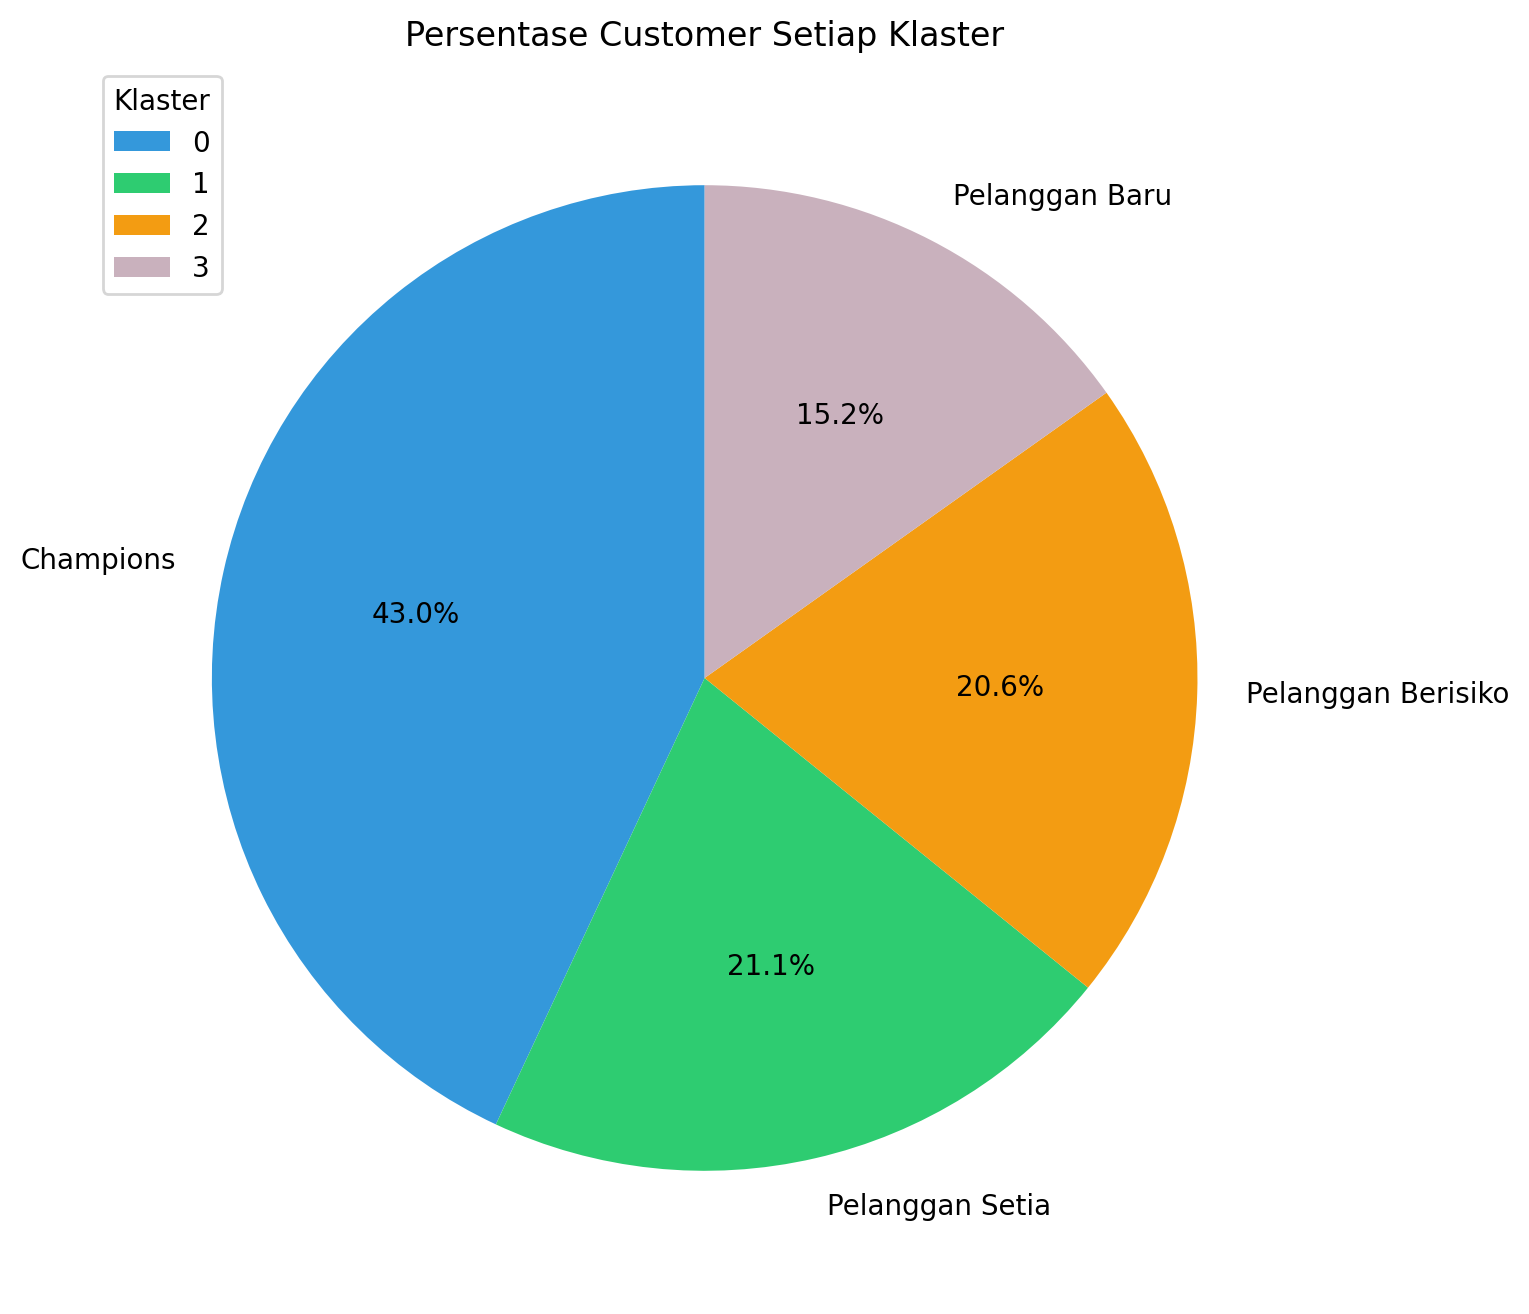

In [ ]:
colors = ['#3498db', '#2ecc71', '#f39c12','#C9B1BD']
total_customers = cluster_counts.sum()

# Hitung persentase pelanggan di setiap klaster
percentage_customers = (cluster_counts / total_customers) * 100

labels = ['Champions','Pelanggan Setia','Pelanggan Berisiko','Pelanggan Baru']

plt.figure(figsize=(8, 8),dpi=200)
plt.pie(percentage_customers, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Persentase Customer Setiap Klaster')
plt.legend(cluster_summary['Cluster'], title='Klaster', loc='upper left')

plt.show()

# Rekomendasi Kategori yang Banyak dibeli

In [ ]:
data_kategori = data.groupby('category')
data_kategori_total = data_kategori['quantity'].sum()


In [ ]:
sorted_categories = data_kategori_total.sort_values(ascending=False)

In [ ]:
top_categories = sorted_categories.head(3)

In [ ]:
print("Kategori yang direkomendasikan:")
for category, total_quantity in top_categories.items():
    print(f"Kategori: {category} dengan Jumlah Total Penjualan: {total_quantity}")

Kategori yang direkomendasikan:
Kategori: Clothing dengan Jumlah Total Penjualan: 103558
Kategori: Cosmetics dengan Jumlah Total Penjualan: 45465
Kategori: Food & Beverage dengan Jumlah Total Penjualan: 44277


In [ ]:
def recommend_products_by_location(grouped_data, top_n=3):

  recommendations = {}
  for location, group in grouped_data:
    top_products = group.groupby('category')['quantity'].sum().nlargest(top_n)
    recommendations[location] = list(top_products.index)
  return recommendations

# Assuming you have your data in a DataFrame named 'data'
data_location_grouped = data.groupby('shopping_mall')
location_recommendations = recommend_products_by_location(data_location_grouped)

# Create a DataFrame from the recommendations dictionary
table_df = pd.DataFrame.from_dict(location_recommendations, orient='index', columns=['Produk 1', 'Produk 2', 'Produk 3'])

print("Rekomendasi berdasarkan retail:")
print(table_df.to_string(index=True))

Rekomendasi berdasarkan retail:
                   Produk 1         Produk 2         Produk 3
Cevahir AVM        Clothing  Food & Beverage        Cosmetics
Emaar Square Mall  Clothing        Cosmetics  Food & Beverage
Forum Istanbul     Clothing        Cosmetics  Food & Beverage
Istinye Park       Clothing  Food & Beverage        Cosmetics
Kanyon             Clothing        Cosmetics  Food & Beverage
Mall of Istanbul   Clothing        Cosmetics  Food & Beverage
Metrocity          Clothing  Food & Beverage        Cosmetics
Metropol AVM       Clothing  Food & Beverage        Cosmetics
Viaport Outlet     Clothing        Cosmetics  Food & Beverage
Zorlu Center       Clothing        Cosmetics  Food & Beverage
